In [1]:
## uncomment for the first run
# import Pkg
# Pkg.add("PyCall")
# Pkg.add("Conda")
# ENV["PYTHON"] = "/opt/anaconda3/envs/turi/bin/python"
# /opt/anaconda3/envs/turi/lib/python3.6/site-packages/
# Pkg.build("PyCall")

In [2]:
using PyCall
tc = pyimport("turicreate")

PyObject <module 'turicreate' from '/opt/anaconda3/envs/turi/lib/python3.6/site-packages/turicreate/__init__.py'>

In [3]:
data_path="../DATA/processed/uber.csv"
data = tc.SFrame(data_path)
#get(data, 1743)

Finished parsing file /Users/uki/REPOS/MarketIndicators.jl/src/DATA/processed/uber.csv
Parsing completed. Parsed 100 lines in 0.026703 secs.
------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
Finished parsing file /Users/uki/REPOS/MarketIndicators.jl/src/DATA/processed/uber.csv
Parsing completed. Parsed 1744 lines in 0.008377 secs.


Day,Date,DJIA_Value,DJIA_Original,DJIA_Avg005,DJIA_Avg030,DJIA_Avg090,DJIA_Avg180,DJIA_Avg365
735975,2016-01-12,8.0,16591.349609,7.6,14.23,16.29,13.83,16.9
735976,2016-01-13,8.0,16593.509766,7.6,14.03,16.24,13.76,16.87
735977,2016-01-14,7.0,16482.050781,7.4,13.7,16.18,13.68,16.84
735978,2016-01-15,5.0,16354.330078,6.8,13.27,16.09,13.59,16.81
735979,2016-01-16,5.0,16354.330078,6.6,12.83,16.0,13.51,16.78
735980,2016-01-17,5.0,16354.330078,6.0,12.47,15.91,13.42,16.75
735981,2016-01-18,5.0,16354.330078,5.4,12.1,15.82,13.34,16.72
735982,2016-01-19,4.0,16171.959961,4.8,11.7,15.71,13.26,16.68
735983,2016-01-20,2.0,15989.450195,4.2,11.3,15.56,13.17,16.65
735984,2016-01-21,3.0,16038.589844,3.8,10.9,15.4,13.08,16.61


In [4]:
row_count = size(data)[1]

1744

In [5]:
# Do not take initial year data as averages are not complete
dict_1743 = get(data, 1743)

Dict{Any,Any} with 31 entries:
  "VIX_Avg365"            => -65.72
  "MFC_MPI_Avg180"        => 27.84
  "DJIA_Avg030"           => 109.63
  "HOUSE_SRT_MM_Avg090"   => 59.16
  "Date"                  => "2020-10-20"
  "DJIA_Value"            => 113.0
  "MFC_MPI_Value"         => 74.0
  "VIX_Avg090"            => -69.93
  "DJIA_Avg180"           => 97.13
  "DJIA_Avg005"           => 115.2
  "HOUSE_SRT_MM_Avg180"   => 4.14
  "MFC_MPI_Avg365"        => 22.17
  "HOUSE_SRT_MM_Avg365"   => 9.5
  "ISM_MFC_EMP_Value"     => 44.0
  "ISM_MFC_EMP_Avg365"    => -6.67
  "VIX_Value"             => -64.0
  "HOUSE_SRT_MM_Value"    => 19.0
  "DJIA_Avg090"           => 107.62
  "Day"                   => 737718
  "MFC_MPI_Avg090"        => 69.84
  "VIX_Avg005"            => -67.4
  "DJIA_Avg365"           => 97.79
  "HOUSE_SRT_MM_Original" => 1.9
  "DJIA_Original"         => 28575.0
  "ISM_MFC_EMP_Avg090"    => 15.37
  ⋮                       => ⋮

In [6]:
# Make a train-test split
train_data, test_data = data.random_split(0.8)
println()

In [7]:
size(train_data)
size(test_data)

(380,)

In [8]:
column_to_predict = "DJIA_Original"

model = tc.regression.create( 
    train_data, 
    target = column_to_predict, 
    features = [
                 #"DJIA_Avg005"
                "DJIA_Avg030"
                ,"DJIA_Avg090"
                ,"DJIA_Avg180"        
                ,"DJIA_Avg365"

                ,"ISM_MFC_EMP_Avg090"
                ,"ISM_MFC_EMP_Avg180"
                ,"ISM_MFC_EMP_Avg365"

                ,"HOUSE_SRT_MM_Value"
                ,"HOUSE_SRT_MM_Avg090"
                ,"HOUSE_SRT_MM_Avg180"
                ,"HOUSE_SRT_MM_Avg365"

                ,"MFC_MPI_Value"
                ,"MFC_MPI_Avg090"
                ,"MFC_MPI_Avg180"
                ,"MFC_MPI_Avg365"
        
                ,"VIX_Avg005"
                ,"VIX_Avg030"
                ,"VIX_Avg090"
                ,"VIX_Avg180"        
                ,"VIX_Avg365"
            ], 
    validation_set="auto", 
    verbose=true
)

Automatically generating validation set from 5% of the data.
Linear regression:
--------------------------------------------------------
Number of examples          : 1301
Number of features          : 20
Number of unpacked features : 20
Number of coefficients    : 21
Starting Newton Method
--------------------------------------------------------
+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+
| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |
+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+
| 1         | 2        | 1.010024     | 2274.233660        | 984.373236           | 353.430896                      | 400.143029                        |
+-----------+----------+-----------

PyObject Class                          : LinearRegression

Schema
------
Number of coefficients         : 21
Number of examples             : 1301
Number of feature columns      : 20
Number of unpacked features    : 20

Hyperparameters
---------------
L1 penalty                     : 0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0157

Settings
--------
Residual sum of squares        : 162512331.4663
Training RMSE                  : 353.4309

Highest Positive Coefficients
-----------------------------
(intercept)                    : 14710.9547
DJIA_Avg030                    : 110.997
VIX_Avg030                     : 20.8379
DJIA_Avg365                    : 20.7971
ISM_MFC_EMP_Avg090             : 16.0783

Lowest Negative Coefficients
----------------------------
VIX_Avg005           

In [9]:
## Save predictions to an SArray
predictions = model.predict(test_data)
#predictions

PyObject dtype: float
Rows: 380
[16783.22778473179, 16673.048633699378, 16571.664938396658, 16390.730179857244, 16638.134568716112, 16985.482817500975, 17113.148269230245, 17179.251782205447, 17643.808044920286, 17672.45033034395, 17595.3079455071, 17564.615228186787, 17531.981989046013, 17617.463614120206, 17677.11552536543, 17779.959235976894, 17709.730150694253, 18049.274576805838, 18065.12308719414, 18091.500647215, 18089.718796958332, 18059.671707043042, 17819.413148691718, 17819.14951632312, 17840.10508921868, 17860.284098542572, 17865.755587441046, 18039.687190951867, 17866.51034325463, 17781.852206358082, 17924.90947697161, 17984.09570992849, 17908.135947543087, 17911.896903796845, 17656.070622965566, 17507.930781362367, 17447.0540786278, 17306.112132566814, 17574.12583011609, 17336.27226732772, 17044.628071996314, 17461.699002329104, 17984.06881089923, 18202.565160179034, 18217.923801120796, 18479.69085672609, 18508.985885147504, 18532.018034803616, 18580.465884816895, 18590.1

In [10]:
initio = 1                        # latin: start
gradus = 30                       # latin: step
finem  = size(predictions)[1] -1  # latin: end

println(column_to_predict, " ", finem)

x_axis_ids        = Vector{Int64}() # Array{Int64,1}
y_axis_preditions = Vector{Float64}()
y_axis_actuals    = Vector{Float64}()

for id in initio:finem
    push!(x_axis_ids, id )
    
    a = get(predictions, id)
    append!(y_axis_preditions, round(a, digits=1))
    
    b = get(test_data, column_to_predict )
    b = get(b, id )
    append!(y_axis_actuals, round(b, digits=1))
    #println( "predicted ", round(a, digits=1) , "\t but actual value was \t", round(b, digits=1) , "\t difference is ",  round(b-a, digits=2)  ) # dict
end


for id in initio:gradus:finem
    a = y_axis_preditions[id]
    b = y_axis_actuals[id]
    println( "predicted ", a , "\t but actual value was \t", b , "\t difference is ",  round(b-a, digits=2)  ) # dict
end

DJIA_Original 379
predicted 16673.0	 but actual value was 	16354.3	 difference is -318.7
predicted 17984.1	 but actual value was 	17873.2	 difference is -110.9
predicted 18495.7	 but actual value was 	18319.7	 difference is -176.0
predicted 20705.5	 but actual value was 	21040.0	 difference is 334.5
predicted 21457.6	 but actual value was 	21529.0	 difference is 71.4
predicted 23325.8	 but actual value was 	23485.2	 difference is 159.4
predicted 25599.5	 but actual value was 	25732.8	 difference is 133.3
predicted 24860.8	 but actual value was 	24815.2	 difference is -45.6
predicted 24907.8	 but actual value was 	24828.3	 difference is -79.5
predicted 26058.6	 but actual value was 	25957.6	 difference is -101.0
predicted 27195.7	 but actual value was 	26931.8	 difference is -263.9
predicted 25853.0	 but actual value was 	26706.2	 difference is 853.2
predicted 26700.6	 but actual value was 	26101.3	 difference is -599.3


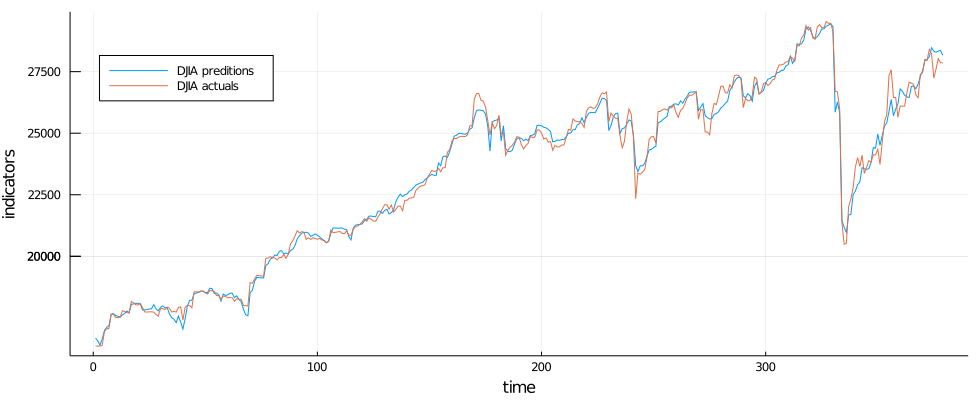

In [11]:
using Plots

#dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(    x_axis_ids,
        [  y_axis_preditions y_axis_actuals
        ], # y-axis
    label    = 
        [ "DJIA preditions" "DJIA actuals" ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

In [12]:
#TODO: write this in a loop to select the best model
# Evaluate the model and save the results into a dictionary
results = model.evaluate( test_data ) #test_data[0:2531]
results

Dict{Any,Any} with 2 entries:
  "rmse"      => 320.434
  "max_error" => 1458.38

In [13]:
rmse = results["rmse"]
rmse = round(rmse, digits=2)

max_error = results["max_error"]
max_error = round(max_error, digits=2)

println( "max_error: ", max_error, ", rmse: ", rmse )
# max_error: 1069.27, rmse: 184.6

max_error: 1458.38, rmse: 320.43


In [14]:
# Export to Core ML
model.export_coreml("../DATA/models/^DJI.mlmodel")